In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("train.csv",low_memory=False)

In [3]:
df.shape

(1048575, 17)

In [4]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [5]:
df.columns = ['ID','vendor_id','pickup_loc','drop_loc','driver_tip','mta_tax','distance','pickup_time','drop_time','num_passengers','toll_amount','payment_method','rate_code','stored_flag','extra_charges','improvement_charge','total_amount']

In [6]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [7]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            1
drop_loc              1
driver_tip            2
mta_tax               1
distance              1
pickup_time           1
drop_time             1
num_passengers        1
toll_amount           2
payment_method        1
rate_code             1
stored_flag           1
extra_charges         1
improvement_charge    2
total_amount          2
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(1048573, 17)

In [10]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [11]:
df.dtypes

ID                      int64
vendor_id              object
pickup_loc            float64
drop_loc              float64
driver_tip             object
mta_tax                object
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

In [12]:
df['vendor_id'].isna().sum()

0

In [13]:
df['vendor_id'].unique()

array(['1', '2'], dtype=object)

In [14]:
df['vendor_id'] = df['vendor_id'].apply(pd.to_numeric, errors='coerce')

In [15]:
df['vendor_id'].dtypes

dtype('int64')

In [16]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [17]:
df['pickup_loc'].unique()

array([170., 151.,  68., 142., 238., 230., 236., 229., 132., 114., 264.,
       166., 263., 137.,  90., 141., 211., 138., 164., 148., 237., 261.,
       234., 186., 161., 107., 140.,  24., 113.,  13., 231., 143., 239.,
       249.,  48.,   4., 162., 158., 163.,  79., 224., 223., 179.,  75.,
       125.,  87., 100., 233.,  12., 262., 144.,  43.,  74., 152.,  66.,
       226., 112.,   7.,  41., 246.,  50.,  88., 256., 193.,  45.,  65.,
       146.,  42.,  85.,  34., 209., 145., 189.,  61., 232., 116.,  52.,
       244.,  80.,  56.,  33., 260., 181.,  17., 194., 196., 259.,  37.,
       197., 188., 127., 255., 228., 247.,  25.,  93.,  49., 265., 215.,
        40., 198., 220., 129., 106.,  82., 130.,  10., 217.,  97.,  95.,
       190., 195.,  18., 167., 157.,  36.,  89., 219.,  28., 119., 168.,
       208.,  62., 243., 225.,  92., 169.,  54., 136., 134., 242.,   9.,
        70.,   1., 124., 156., 227., 159., 207.,  83., 135.,  35., 216.,
        73.,  47., 235., 173.,  26., 218., 108., 12

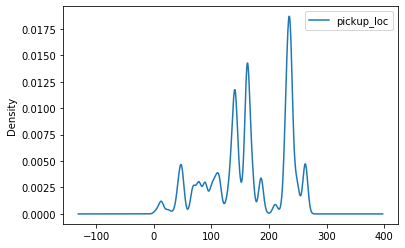

In [18]:
pd.DataFrame(df['pickup_loc']).plot(kind='density')

In [19]:
df['drop_loc'].unique()

array([233., 243.,  90., 234., 238.,  48., 140.,  13., 141., 164., 170.,
       264., 151., 246., 138.,  79., 230., 263., 232., 143., 229.,  50.,
       237., 144.,  24., 142., 100., 161.,  75., 236., 239., 261.,  41.,
       162., 125.,   7., 137., 158., 107., 116.,  74., 113., 211., 186.,
        68., 132.,  87., 179., 226., 249., 145., 262.,  42.,  33., 166.,
       218.,  82., 163.,  45., 224., 231., 222., 244., 152., 220., 256.,
        66., 265., 216., 225., 102.,  80., 148., 202.,  25., 255.,  12.,
       223., 114.,  43., 193.,   1.,  85.,  88.,  14., 149., 181., 112.,
       169., 248.,  40.,  49., 257.,  52.,  39.,   4., 196.,  65.,  61.,
       146., 127., 209.,  91., 200., 168., 180., 195., 130.,  95., 228.,
        36.,  97., 173., 203.,  89., 129., 189.,  18.,  67.,  83.,  37.,
        70., 201., 134., 247.,  69., 135., 259.,  10., 121.,  59., 252.,
         9.,  98., 188., 198., 213.,  17., 182.,  28., 241., 106.,  63.,
        54.,  26., 126.,  60.,  76., 160., 217.,  3

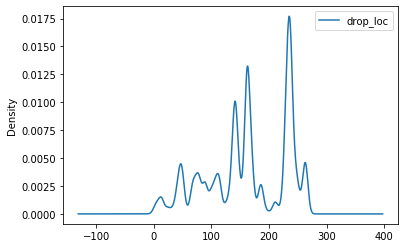

In [20]:
pd.DataFrame(df['drop_loc']).plot(kind='density')

In [21]:
df['total_amount'].unique()

array(['9.13', '21.36', '8.8', ..., '58.4', '64.94', '128.75'],
      dtype=object)

In [18]:
df['total_amount'] = df['total_amount'].apply(pd.to_numeric, errors='coerce')

In [19]:
df['total_amount'].isna().sum()

521

In [20]:
df = df.dropna()

In [21]:
df.shape

(1048052, 17)

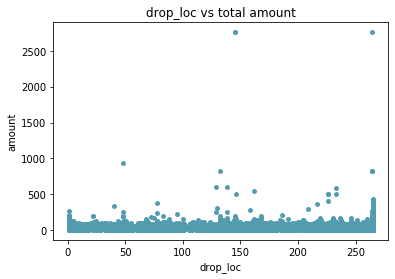

In [22]:
def scatter_plot(x_data, y_data, x_label, y_label, title):
    
    plt.scatter(x_data, y_data, s = 15, color = '#539caf')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    
    
scatter_plot(x_data = df['drop_loc']
            , y_data = df['total_amount'] 
            , x_label = 'drop_loc'
            , y_label = 'amount'
            , title = 'drop_loc vs total amount')

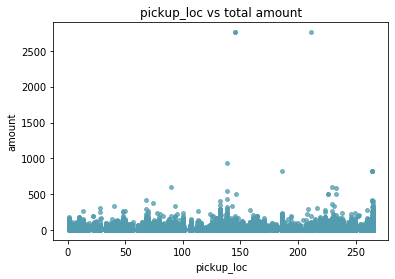

In [35]:
def scatter_plot(x_data, y_data, x_label, y_label, title):
    
    plt.scatter(x_data, y_data, s = 15, color = '#539caf', alpha = 0.75)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    
    
scatter_plot(x_data = df['pickup_loc']
            , y_data = df['total_amount'] 
            , x_label = 'pickup_loc'
            , y_label = 'amount'
            , title = 'pickup_loc vs total amount')

In [ ]:
#Since the graph of pickup_loc vs total_amount and drop_loc vs total_amount has 

In [30]:
df['driver_tip'].unique()

array(['1.83', '3.56', '1.5', ..., '99', '9.42', '37.2'], dtype=object)

In [23]:
df['driver_tip'] = df['driver_tip'].apply(pd.to_numeric, errors='coerce')

In [24]:
df['driver_tip'].fillna(0.0,inplace=True)

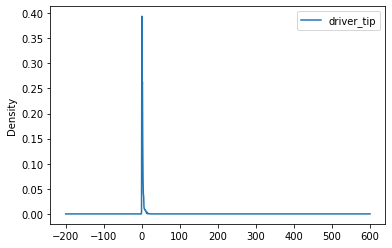

In [33]:
pd.DataFrame(df['driver_tip']).plot(kind='density')

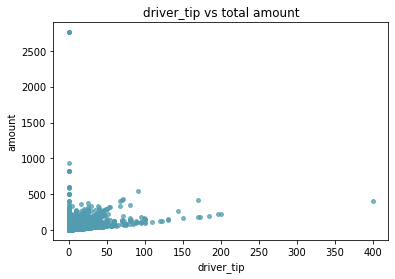

In [36]:
scatter_plot(x_data = df['driver_tip']
            , y_data = df['total_amount'] 
            , x_label = 'driver_tip'
            , y_label = 'amount'
            , title = 'driver_tip vs total amount')

In [37]:
df['driver_tip'].corr(df['total_amount'])

0.6753047280115074

In [38]:
df['mta_tax'].value_counts()

0.5    1042799
0         5253
Name: mta_tax, dtype: int64

In [25]:
df['mta_tax'] = df['mta_tax'].apply(pd.to_numeric, errors='coerce')

In [26]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount          float64
dtype: object

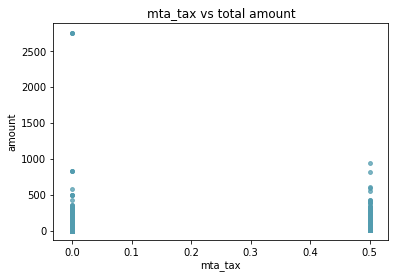

In [41]:
scatter_plot(x_data = df['mta_tax']
            , y_data = df['total_amount'] 
            , x_label = 'mta_tax'
            , y_label = 'amount'
            , title = 'mta_tax vs total amount')

In [42]:
df['toll_amount'].unique()

array(['0', '5.76', '5.54', '2.64', '17.5', '15', '11.52', '7', '2.16',
       '10.5', '16.26', '20', '5.78', '15.5', '16.5', '12.5', '10.08',
       '18.25', '15.01', '10.05', '22.02', '14.65', '5.11', '8.5', '14.1',
       '2.7', '27.5', '11', '5.5', '6.5', '17.28', '26.26', '14.95',
       '10.2', '29', '5.4', '15.1', '19.5', '16', '17', '13.5', '25',
       '17.58', '23.26', '21', '18.5', '14.82', '6', '17.1', '18.26',
       '5.56', '14.5', '15.45', '13', '26.7', '15.3', '5', '5.74', '20.5',
       '18', '24', '24.5', '5.55', '12.65', '18.8', '14.58', '8.76',
       '0.02', '0.06', '15.4', '14.06', '1.5', '12.95', '11.08', '19',
       '2.54', '14', '30.76', '14.8', '16.9', '21.26', '67.5', '57.76',
       '5.46', '16.95', '24.76', '8.4', '20.76', '24.02', '15.05', '19.8',
       '17.4', '7.92', '16.1', '95.76', '3', '21.9', '5.77', '16.04',
       '15.35', '5.75', '7.51', '9.53', '5.28', '16.8', '5.88', '5.73',
       '13.75', '8', '5.7', '21.5', '14.26', '5.84', '54', '15.95',
 

In [27]:
df['toll_amount'] = df['toll_amount'].apply(pd.to_numeric, errors='coerce')

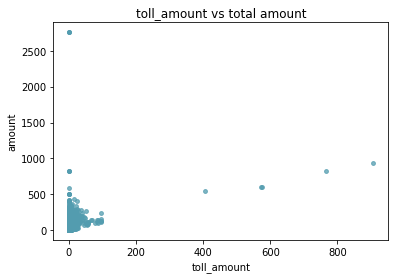

In [44]:
scatter_plot(x_data = df['toll_amount']
            , y_data = df['total_amount'] 
            , x_label = 'toll_amount'
            , y_label = 'amount'
            , title = 'toll_amount vs total amount')

In [45]:
df['num_passengers'].unique()

array([1., 2., 6., 3., 4., 5., 0., 8., 7., 9.])

In [46]:
df['rate_code'].unique()

array([ 1.,  2.,  3.,  4.,  5., 99.,  6.])

In [28]:
df = df.drop(columns=['stored_flag','payment_method'])

In [48]:
df['extra_charges'].unique()

array(['1', '0', '0.5', '4.5', '1.8', '0.8', '0.05', '6.5', '1.5', '0.2',
       '0.1', '1.3'], dtype=object)

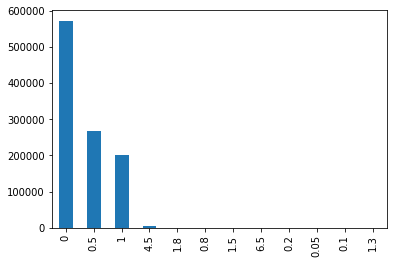

In [49]:
fig, ax = plt.subplots()
df['extra_charges'].value_counts().plot(ax=ax, kind='bar')

In [29]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount           float64
rate_code             float64
extra_charges          object
improvement_charge     object
total_amount          float64
dtype: object

In [30]:
df['extra_charges'] = df['extra_charges'].apply(pd.to_numeric, errors='coerce')

In [52]:
df['improvement_charge'].unique()

array(['0.3', '0'], dtype=object)

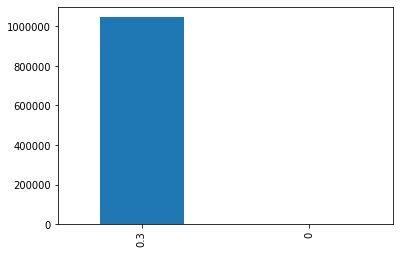

In [53]:
fig, ax = plt.subplots()
df['improvement_charge'].value_counts().plot(ax=ax, kind='bar')

In [31]:
df['improvement_charge'] = df['improvement_charge'].apply(pd.to_numeric, errors='coerce')

In [55]:
df['improvement_charge'].corr(df['total_amount'])

-0.0068108804212601735

In [32]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount           float64
rate_code             float64
extra_charges         float64
improvement_charge    float64
total_amount          float64
dtype: object

In [57]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,rate_code,extra_charges,improvement_charge,total_amount
ID,1,-0.000409778,-0.000452239,-0.00112169,0.000950021,-0.000725773,0.00152987,0.000202772,2.91444e-05,0.000300448,-0.000355229,-0.00207609,0.00185946
vendor_id,-0.000409778,1,-0.0175471,-0.0120261,0.0136633,0.0152961,0.0209759,0.293962,0.0066169,-0.00108459,0.00823897,-0.00491975,0.0156509
pickup_loc,-0.000452239,-0.0175471,1,0.111415,-0.0419421,-0.000117555,-0.0916764,-0.00657059,-0.0323878,-0.00501859,-0.010393,-0.00488512,-0.069816
drop_loc,-0.00112169,-0.0120261,0.111415,1,-0.0556301,0.0474418,-0.104543,-0.00506119,-0.042402,-6.58447e-06,-0.0199747,-0.00808207,-0.0861558
driver_tip,0.000950021,0.0136633,-0.0419421,-0.0556301,1,-0.191502,0.570457,-0.000574049,0.348997,0.16725,0.0654219,0.00495636,0.675305
mta_tax,-0.000725773,0.0152961,-0.000117555,0.0474418,-0.191502,1,-0.164368,0.00868817,-0.256675,-0.389614,0.0313454,0.215548,-0.294364
distance,0.00152987,0.0209759,-0.0916764,-0.104543,0.570457,-0.164368,1,0.0183202,0.462535,0.215514,0.120161,0.0111625,0.853042
num_passengers,0.000202772,0.293962,-0.00657059,-0.00506119,-0.000574049,0.00868817,0.0183202,1,0.00800686,-0.00555812,0.0060565,0.00521236,0.0119708
toll_amount,2.91444e-05,0.0066169,-0.0323878,-0.042402,0.348997,-0.256675,0.462535,0.00800686,1,0.16174,0.0444447,0.0015055,0.544119
rate_code,0.000300448,-0.00108459,-0.00501859,-6.58447e-06,0.16725,-0.389614,0.215514,-0.00555812,0.16174,1,0.0296209,-0.247124,0.277144


In [33]:
df=df.drop(columns=['pickup_time','drop_time'])

In [34]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
num_passengers        float64
toll_amount           float64
rate_code             float64
extra_charges         float64
improvement_charge    float64
total_amount          float64
dtype: object

In [35]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
num_passengers        0
toll_amount           0
rate_code             0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

# Training the model on test data

In [36]:
y = df.pop('total_amount')

In [37]:
X = df

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(838441, 12)
(209611, 12)
(838441,)
(209611,)


In [41]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

MemoryError: 

In [42]:
reg = linear_model.LinearRegression()

In [43]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = reg.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 5.31254123e-08 -1.00971489e-02  4.64668860e-04  5.22257529e-04
  1.37458584e+00 -3.86643226e+01  2.52982023e+00  8.52362852e-03
  9.72690036e-01  1.61211203e+00  5.24594346e-01  4.55577113e+01]
Mean squared error: 58.54
Variance score: 0.76


In [65]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm

In [66]:
clf_svm = svm.SVR(gamma='auto')
# clf_svm.fit(X_train,y_train)
# pred_svm =clf_svm.predict(X_test)
# svm_acc=accuracy_score(y_test,pred_svm)
# print(svm_acc)

In [ ]:
clf_svm.fit(X_train,y_train)

In [ ]:
pred_svm =clf_svm.predict(X_test)

In [ ]:
svm_acc=accuracy_score(y_test,pred_svm)
print(svm_acc)

# Predicting on Test Value

In [71]:
df2 = pd.read_csv("test.csv",low_memory=False)

In [72]:
df2.shape

(154235, 16)

In [73]:
df2.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,1,68.0,186.0,1.00,0.5,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,1,170.0,161.0,2.55,0.5,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
3,3,1,170.0,233.0,2.00,0.5,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
4,4,1,237.0,236.0,1.00,0.5,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3


In [74]:
df2.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount           float64
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges         float64
improvement_charge    float64
dtype: object

In [75]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
num_passengers        0
toll_amount           0
rate_code             0
extra_charges         0
improvement_charge    0
dtype: int64

In [90]:
df2 = df2.drop(columns=['pickup_loc','drop_loc'])

In [91]:
df2['vendor_id'].unique()

array([1, 2], dtype=int64)

In [92]:
df2.dtypes

ID                      int64
vendor_id               int64
driver_tip            float64
mta_tax               float64
distance              float64
num_passengers        float64
toll_amount           float64
rate_code             float64
extra_charges         float64
improvement_charge    float64
dtype: object

In [93]:
df2.shape

(154235, 10)

In [94]:
X_TEST = df2

In [95]:
Y_pred = reg.predict(X_TEST)

In [96]:
submission = pd.DataFrame({ 'ID': X_TEST.ID.values, 'total_amount': Y_pred })
submission.to_csv("my_submission2.csv", index=False)